In [92]:
from PIL import Image

import glob
%pylab inline
from numpy import *
set_printoptions(linewidth=200)


pngs = []
pngs += glob.glob('pngs/*_09.png')
pngs += glob.glob('pngs/*__8.png')
pngs += glob.glob('pngs/*__1.png')
for png in pngs:
    print(png)
    img = Image.open(png)
    #imshow(img)
    a = array(img)
    print( a.shape )
    a = a[:,:,0]   #  select the red layer (because red, green, blue all the same)
    print( a.shape,a.dtype,a.max() )
    a = array(255-a,dtype=float)
    h,w = a.shape
    #for i in range(h):
    #    for j in range(w):
    #        print( str( int( a[i,j]> 0) ) , end='' )
    #    print()
    break


Populating the interactive namespace from numpy and matplotlib
pngs/079_20170329_knjames_09.png
(125, 100, 4)
(125, 100) uint8 255


##  Extract features

In [93]:
# simple features like total amount of ink involved in a period is a lot less than in other no.s 


n = len(pngs)   # row 
features = ['ink','width','height','topheaviness','rightheaviness','log aspect']
d = len(features) #column 
F = empty((n,d)) # array of feature vectors


for i, png in enumerate(pngs):
    #print(i,png)
    img = Image.open(png)
    # imshow(img)
    a = array(img)
    #print(a.shape)
    a = a[:,:,0] ## select red layer (r,b,g) opacity & rgb all same
    #print(a.shape,a.dtype,a.max())
    h,w = a.shape

    x = linspace(0,w,w,endpoint = False)
    y = linspace(0,h,h,endpoint = False)

    X,Y = meshgrid(x,y)

    a = array(255-a,dtype=float)
    ink = a.sum()
    F[i,0] = ink/((255*w*h)/5)   # can we normalize as the pixels range from 0 255 and could be in billions

    xmin = X[ a>0 ].min()  # the minimum  x value where a>0  
    xmax = X[ a>0 ].max()  
    ymin = X[ a>0 ].min()  # the minimum  y value where a>0  
    ymax = X[ a>0 ].max()  
    width  = xmax - xmin
    height = ymax - ymin
    F[i,1] = width/w
    F[i,2] = height/h
    
    ###############
    # for topheavy feature
    
    xc = (xmin+xmax)/2  # center of character
    yc = (ymin+ymax)/2 
    
    # could alternatively use center of mass
    # xc = (a*X).sum()/ink
    # yc = (a*Y).sum()/ink

    # total ink above center
    F[i,3] = a[Y>yc].sum()/ink
    
    # total ink right of center
    F[i,4] = a[X>xc].sum()/ink
    
    # aspect
    F[i,5] = log10(height/width)
    
#F[:,0] /= F[:,0].max(index=1)    # to normalize feature "ink"
print(F)

[[ 0.04217412  0.13        0.104       1.          0.51989883  0.        ]
 [ 0.04463216  0.15        0.12        1.          0.51312691  0.        ]
 [ 0.04716863  0.11        0.088       1.          0.48975723  0.        ]
 ..., 
 [ 0.34086275  0.47        0.376       0.80831569  0.22400368  0.        ]
 [ 0.27825725  0.23        0.184       0.63830903  0.48049766  0.        ]
 [ 0.57294902  0.67        0.536       0.71379447  0.57038781  0.        ]]


#### we cannot make a picture of dots in 6D space
#### we could make an array of all coordinates place projections


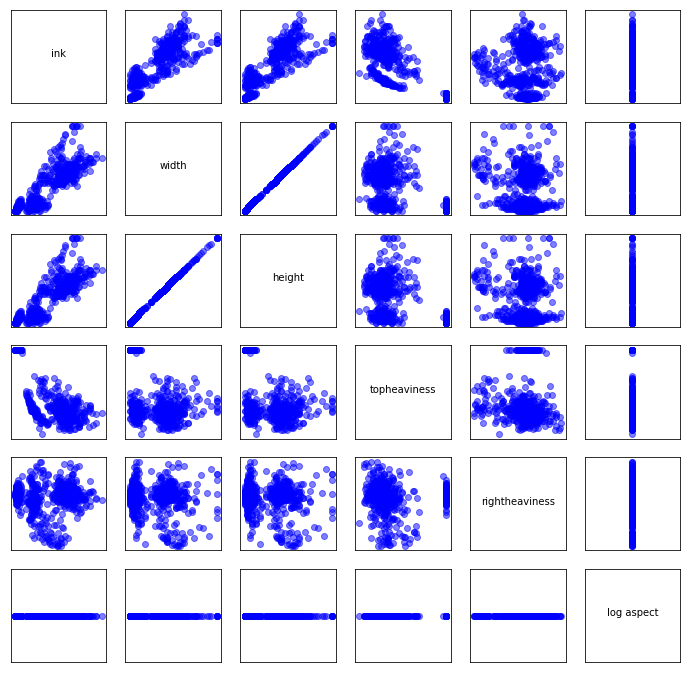

In [94]:
figure(figsize=(12,12))
for i in range(d):
    for j in range(d):
        # plot the i,j coordinate plane projections
        subplot(d,d,i*d+j+1)
        if i==j: 
            text(.5,.5,features[i],ha='center')
        else:
            plot(F[:,j],F[:,i],'bo',alpha=0.5)
        xticks([])
        yticks([])
            

In [100]:
c = list(set([ png[-6:-4] for png in pngs]))
c
colors = 'rgb'
colordict = {k:colors[i] for i,k in enumerate(c)}
colordict

{'09': 'g', '_1': 'r', '_8': 'b'}

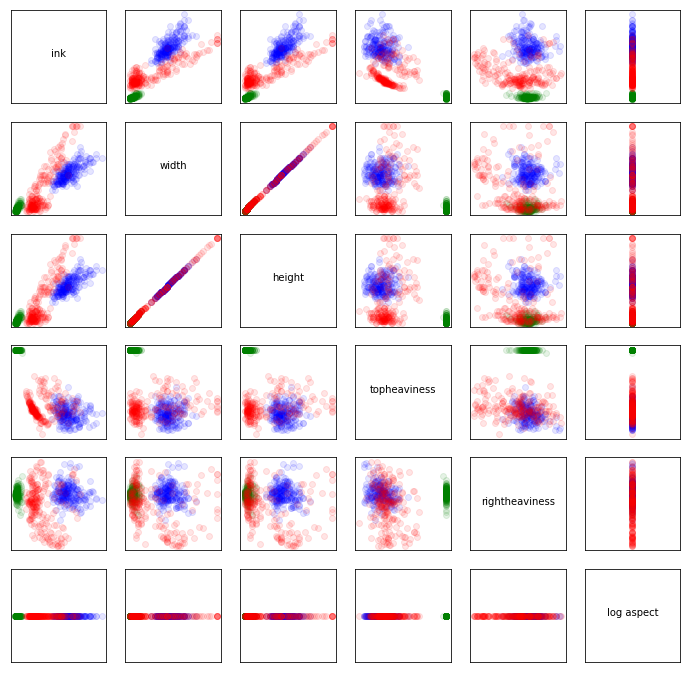

In [101]:
figure(figsize=(12,12))
for i in range(d):
    for j in range(d):
        # plot i,j coordinate plane projections
        subplot(d,d,i*d+j+1)
        if i==j: 
            text(.5,.5,features[i],ha='center')
        else: 
            for k,png in enumerate(pngs):
                plot(F[k,j],F[k,i],'o',alpha = 0.1,color=colordict[png[-6:-4]])
        xticks([])
        yticks([])